In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [66]:
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [67]:
data = data[data.location == 'Germany'][['date', 'location', 'new_cases', 'new_deaths', 'new_vaccinations', 'people_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].copy()
data['date'] = pd.to_datetime(data.date)
data.tail()

,date,location,new_cases,new_deaths,new_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
30745,2021-05-06,Germany,17917.0,284.0,942639.0,26252533.0,31.33,8.80
30746,2021-05-07,Germany,15090.0,234.0,818428.0,26875908.0,32.08,9.04
30747,2021-05-08,Germany,13125.0,130.0,395604.0,27133214.0,32.38,9.21
30748,2021-05-09,Germany,0.0,55.0,268787.0,27306096.0,32.59,9.33
30749,2021-05-10,Germany,7321.0,274.0,NaN,NaN,NaN,NaN


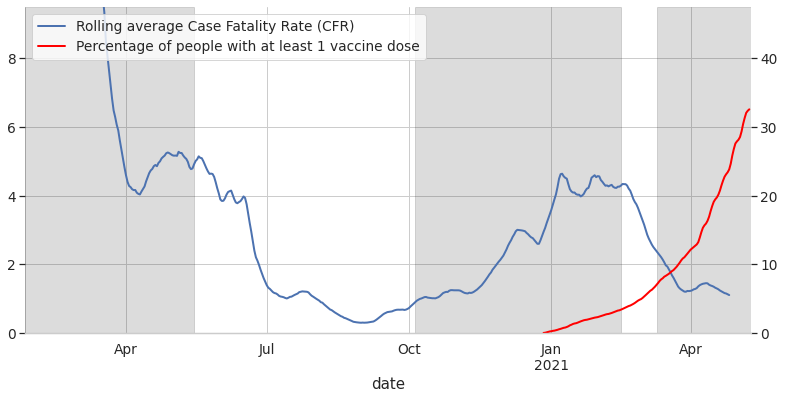

In [151]:
sns.set(font_scale=1.25)
sns.set_style("whitegrid")

cfr = 100.0 * data.new_deaths.rolling(14).mean().shift(-14) / data.new_cases.rolling(14).mean()
data['CFR'] = cfr.rolling(7).mean()

ax = data[['date', 'CFR']].set_index('date').plot(linewidth=2, figsize=(13,6))
plt.ylim([-0.00, 9.5])

ax.axvspan(pd.Timestamp('2020-01-27 00:00:00'), pd.Timestamp('2020-05-15 00:00:00'), alpha=0.15, color='k')
ax.axvspan(pd.Timestamp('2020-10-05 00:00:00'), pd.Timestamp('2021-02-15 00:00:00'), alpha=0.15, color='k')
ax.axvspan(pd.Timestamp('2021-03-10 00:00:00'), pd.Timestamp('2021-05-11 00:00:00'), alpha=0.15, color='k')

handles, labels = ax.get_legend_handles_labels()

ax2 = ax.twinx()
ax2.grid(False)

data[['date', 'people_vaccinated_per_hundred']].set_index('date').plot(ax=ax2, linewidth=2, color='red', alpha=1, label='')
plt.ylim([-0.00, 95/2])

handles2, labels2 = ax2.get_legend_handles_labels()

ax.legend(handles + handles2, ['Rolling average Case Fatality Rate (CFR)', 'Percentage of people with at least 1 vaccine dose'], loc='upper left')
ax2.get_legend().remove()

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
sns.despine(left=True)
plt.show()
